###Engagement Score Prediction of the video on the user level
The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

In [ ]:
# load packages
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# display warnings only the first time
import warnings
warnings.filterwarnings('ignore')

In [12]:
#load the train and test data files
train_HK=pd.read_csv('train data_HK.csv')
test_HK=pd.read_csv('test data_HK.csv')

In [13]:
train_HK.shape  #Rows and column in the train data


(89197, 10)

In [14]:
test_HK.shape   #Rows and column in the test data

(11121, 9)

In [15]:
train_HK.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [16]:
test_HK.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [18]:
train_HK.drop(['row_id'], axis='columns', inplace=True)
train_HK.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


In [19]:
test_HK.drop(['row_id'], axis='columns', inplace=True)
test_HK.head()

,user_id,category_id,video_id,age,gender,profession,followers,views
0,7986,12,42,14,Male,Student,180,138
1,11278,34,115,14,Male,Student,230,840
2,17245,8,110,44,Female,Working Professional,280,628
3,9851,16,137,18,Male,Student,270,462
4,16008,34,96,47,Female,Other,230,840


In [20]:
train_HK.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           89197 non-null  int64  
 1   category_id       89197 non-null  int64  
 2   video_id          89197 non-null  int64  
 3   age               89197 non-null  int64  
 4   gender            89197 non-null  object 
 5   profession        89197 non-null  object 
 6   followers         89197 non-null  int64  
 7   views             89197 non-null  int64  
 8   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 6.1+ MB


There are two categorial colums and no missing values.

In [21]:
test_HK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      11121 non-null  int64 
 1   category_id  11121 non-null  int64 
 2   video_id     11121 non-null  int64 
 3   age          11121 non-null  int64 
 4   gender       11121 non-null  object
 5   profession   11121 non-null  object
 6   followers    11121 non-null  int64 
 7   views        11121 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 695.2+ KB


In [22]:
#For converting categorial columns into integers using onehot encoding for the columns gender and profession
from sklearn.preprocessing import OneHotEncoder    


In [23]:
gender=pd.get_dummies(train_HK.gender)
gender_test=pd.get_dummies(test_HK.gender)


In [24]:
gender.head()

,Female,Male
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [25]:
gender_dummy=pd.get_dummies(train_HK.gender, drop_first=True) 
gender_dummy_test=pd.get_dummies(test_HK.gender, drop_first=True)

In [27]:
gender_dummy.head(2)

,Male
0,1
1,0


In [28]:
prof=pd.get_dummies(train_HK.profession) # for train data column profession


In [30]:
prof.head(2)

,Other,Student,Working Professional
0,0,1,0
1,0,1,0


In [31]:
prof_test=pd.get_dummies(test_HK.profession)

In [33]:
prof_test.head(2)

,Other,Student,Working Professional
0,0,1,0
1,0,1,0


In [34]:
prof_dummy=pd.get_dummies(train_HK.profession,drop_first= True)   #Droping the first column as its understood already
prof_dummy_test=pd.get_dummies(test_HK.profession,drop_first= True)

In [35]:
prof_dummy.head(2)

,Student,Working Professional
0,1,0
1,1,0


In [36]:
prof_dummy1= prof_dummy.rename({'Working Professional':'Working'}, axis='columns') #Renaming the column

In [38]:
prof_dummy1.head(2)

,Student,Working
0,1,0
1,1,0


In [39]:
prof_dummy_test1=prof_dummy_test.rename({'Working Professional':'Working'}, axis='columns') #Renaming the column

In [40]:
prof_dummy_test1.head(2)

,Student,Working
0,1,0
1,1,0


In [41]:
df_train=pd.concat([train_HK,gender_dummy,prof_dummy1],axis=1) # Concatenate the dummy columns data with the train data
df_train.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,Male,Student,Working
0,19990,37,128,24,Male,Student,180,1000,4.33,1,1,0
1,5304,32,132,14,Female,Student,330,714,1.79,0,1,0
2,1840,12,24,19,Male,Student,180,138,4.35,1,1,0
3,12597,23,112,19,Male,Student,220,613,3.77,1,1,0
4,13626,23,112,27,Male,Working Professional,220,613,3.13,1,0,1


In [42]:
print(df_train.shape)

df_train.drop(['gender', 'profession'], axis='columns', inplace=True) #dropping the 2 categorial columns after get dummies
print(df_train.shape)

(89197, 12)
(89197, 10)


In [43]:
#concatenate test data
df_test=pd.concat([test_HK,gender_dummy_test,prof_dummy_test1],axis=1)
df_test.head(2)

,user_id,category_id,video_id,age,gender,profession,followers,views,Male,Student,Working
0,7986,12,42,14,Male,Student,180,138,1,1,0
1,11278,34,115,14,Male,Student,230,840,1,1,0


In [44]:
print(df_test.shape)

df_test.drop(['gender', 'profession'], axis='columns', inplace=True) #dropping the 2 categorial columns after get dummies
print(df_test.shape)

(11121, 11)
(11121, 9)


##Exploratory Data Analysis (EDA)


In [45]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,89197.0,13881.909806,8005.582771,1.0,6945.0,13892.00,20819.00,27734.0
category_id,89197.0,18.323733,11.675154,1.0,8.0,16.00,26.00,47.0
video_id,89197.0,77.715383,48.469656,1.0,34.0,76.00,120.00,175.0
age,89197.0,24.848616,8.955535,10.0,18.0,23.00,32.00,68.0
followers,89197.0,252.460172,46.094468,160.0,230.0,240.00,280.00,360.0
views,89197.0,502.980268,268.569482,30.0,229.0,467.00,714.00,1000.0
engagement_score,89197.0,3.487797,0.863498,0.0,2.9,3.71,4.15,5.0
Male,89197.0,0.587430,0.492299,0.0,0.0,1.00,1.00,1.0
Student,89197.0,0.500443,0.500003,0.0,0.0,1.00,1.00,1.0
Working,89197.0,0.198650,0.398986,0.0,0.0,0.00,0.00,1.0


In [46]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,11121.0,13825.707400,8001.221954,2.0,6881.0,13857.0,20763.0,27734.0
category_id,11121.0,15.666487,10.313259,1.0,8.0,12.0,25.0,46.0
video_id,11121.0,79.742559,48.702501,1.0,39.0,80.0,121.0,174.0
age,11121.0,24.854150,8.953976,10.0,18.0,23.0,32.0,68.0
followers,11121.0,249.691574,38.511469,160.0,230.0,240.0,270.0,360.0
views,11121.0,454.959986,249.759038,44.0,229.0,369.0,662.0,990.0
Male,11121.0,0.573420,0.494602,0.0,0.0,1.0,1.0,1.0
Student,11121.0,0.501034,0.500021,0.0,0.0,1.0,1.0,1.0
Working,11121.0,0.196295,0.397212,0.0,0.0,0.0,0.0,1.0


In [47]:
# Lets plot the correlation matrix 

corr_matrix = df_train.corr()
corr_matrix

,user_id,category_id,video_id,age,followers,views,engagement_score,Male,Student,Working
user_id,1.000000,0.002139,0.005232,-0.000036,-0.002026,-0.001843,-0.002900,-0.003807,-0.004601,-0.000130
category_id,0.002139,1.000000,0.556550,-0.003152,0.056432,0.079321,-0.094288,-0.008274,0.006461,-0.002116
video_id,0.005232,0.556550,1.000000,-0.005615,0.098778,-0.029448,-0.030552,0.003251,0.001691,-0.003627
age,-0.000036,-0.003152,-0.005615,1.000000,0.004623,0.011042,-0.232626,-0.012758,-0.790783,0.417005
followers,-0.002026,0.056432,0.098778,0.004623,1.000000,0.360808,0.000855,0.003085,-0.001156,-0.004348
views,-0.001843,0.079321,-0.029448,0.011042,0.360808,1.000000,-0.084679,-0.033937,-0.007185,0.005235
engagement_score,-0.002900,-0.094288,-0.030552,-0.232626,0.000855,-0.084679,1.000000,0.408702,0.289979,-0.225363
Male,-0.003807,-0.008274,0.003251,-0.012758,0.003085,-0.033937,0.408702,1.000000,0.004978,0.000932
Student,-0.004601,0.006461,0.001691,-0.790783,-0.001156,-0.007185,0.289979,0.004978,1.000000,-0.498331
Working,-0.000130,-0.002116,-0.003627,0.417005,-0.004348,0.005235,-0.225363,0.000932,-0.498331,1.000000


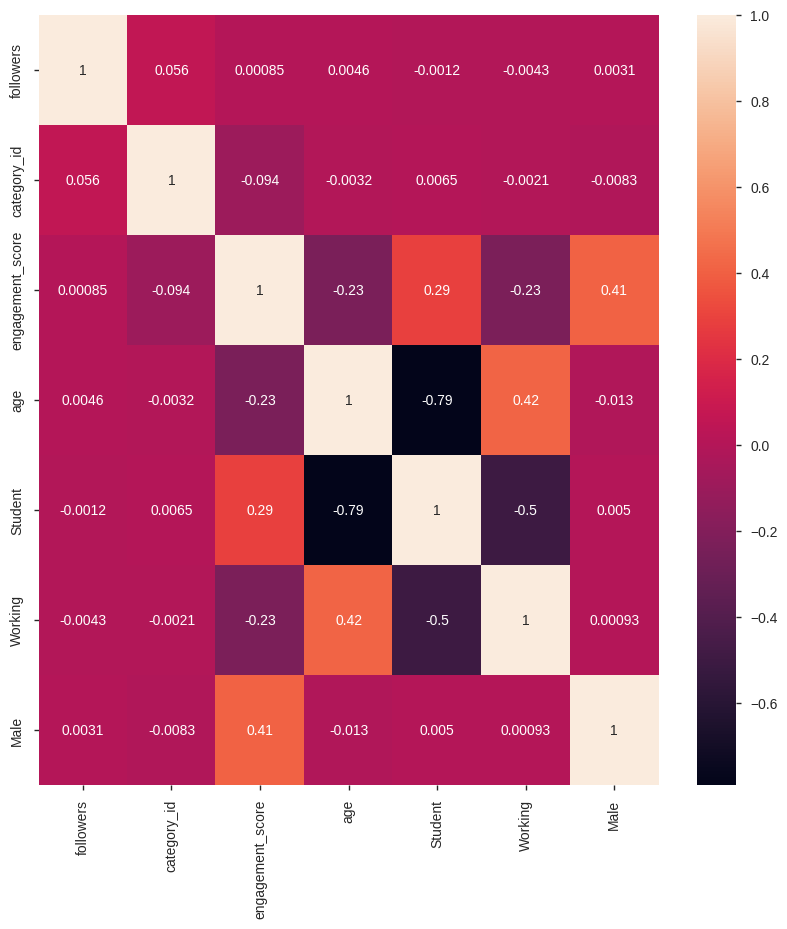

In [ ]:
# Lets take random 7 columns and plot the correlation matrix

small_df = df_train.sample(7, axis=1)
small_corr_matrix = small_df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(small_corr_matrix, annot=True)

## Observation:
We can see that the data is not correlated much.
Age is negativle corelated to student as we see student's age range is 10 to 35 years in the data.

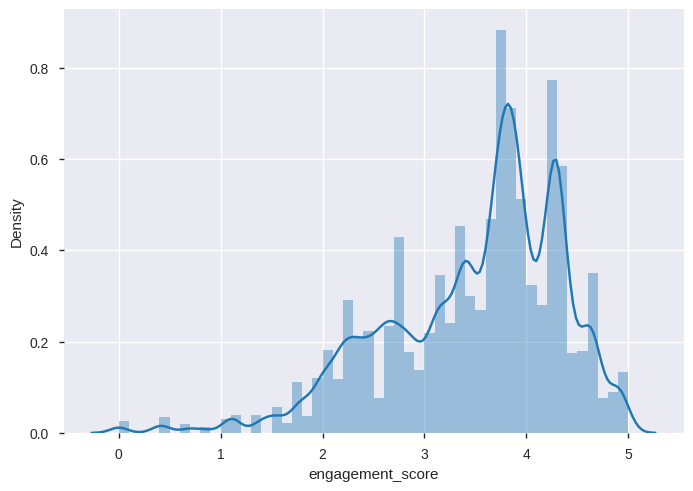

In [ ]:
#Univariate analysis

sns_plot = sns.distplot(df_train["engagement_score"])

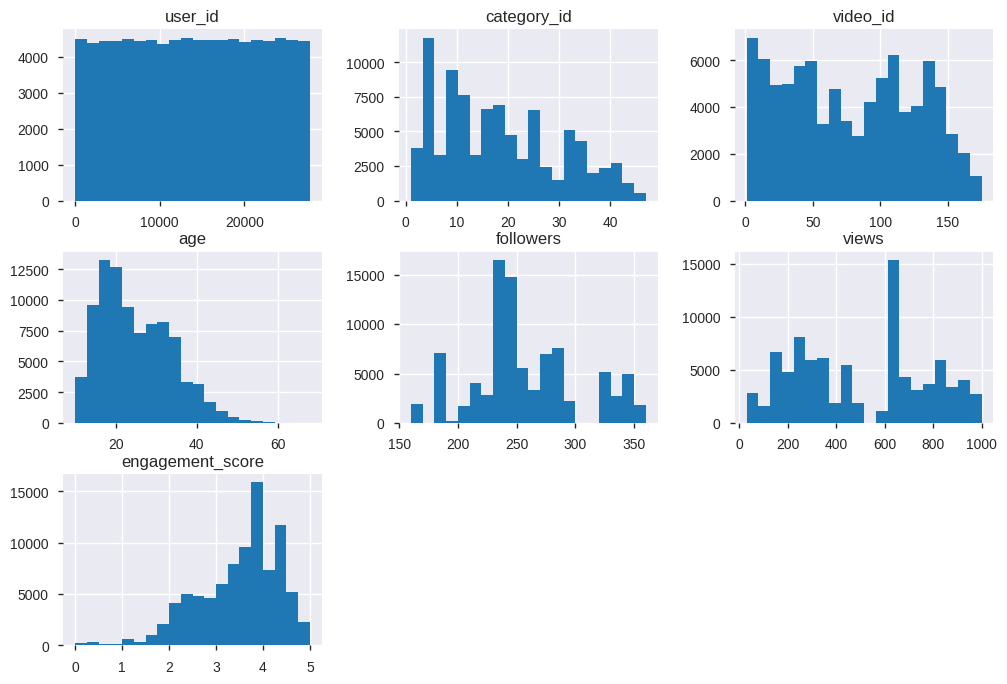

In [ ]:
#Distributions of the variables/features

train_HK.hist(figsize=(12,8),bins=20)
plt.show()

# Observation:
1. The age of the users and category of the video both are right skewed distributed or positively skewed which shows the mean, median and mode are all different. Mode is the highest point of the histogram is nearby 20 for age of the users and for category of the video mode is 5.

2. The engagement score of the users is left skewed distributed or negatively skewed and mode is around 4.


In [ ]:
sns.pairplot(df_train, hue="engagement_score", diag_kind="hist")

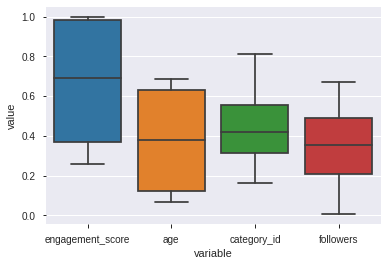

In [ ]:
# box plot or outliers
df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['engagement_score','age','category_id','followers'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()


In [ ]:
pip install pandas_profiling

In [50]:
#Split the target from train data
X = df_train.drop(['engagement_score'], axis = 1)

In [51]:
X.shape

(89197, 9)

In [52]:
y=df_train['engagement_score']       # The target label
y.unique()

array([4.33, 1.79, 4.35, 3.77, 3.13, 3.33, 3.8 , 3.87, 2.88, 3.73, 0.  ,
       3.61, 4.2 , 4.31, 4.16, 3.43, 4.96, 2.89, 3.69, 1.71, 2.06, 3.65,
       4.01, 4.37, 4.66, 3.4 , 2.65, 3.63, 3.81, 2.48, 4.11, 4.04, 4.5 ,
       3.93, 3.47, 3.99, 3.3 , 4.18, 4.14, 3.71, 4.26, 1.96, 4.65, 4.27,
       1.84, 2.24, 1.95, 3.67, 4.51, 2.59, 4.28, 3.59, 3.11, 2.3 , 3.37,
       3.53, 2.6 , 2.64, 3.83, 3.66, 1.39, 2.7 , 4.22, 3.5 , 4.53, 3.04,
       4.21, 1.5 , 3.  , 3.16, 4.48, 4.84, 2.71, 4.09, 4.44, 1.55, 3.19,
       2.35, 3.34, 4.6 , 0.02, 4.29, 2.16, 2.8 , 3.91, 3.89, 4.25, 0.4 ,
       5.  , 1.37, 4.63, 2.2 , 2.32, 3.95, 4.06, 4.13, 2.53, 2.96, 3.09,
       0.69, 3.22, 4.23, 4.56, 4.9 , 3.29, 3.26, 2.9 , 4.38, 3.62, 3.97,
       3.52, 4.69, 3.74, 2.56, 3.17, 3.45, 4.62, 3.49, 3.9 , 2.4 , 3.82,
       3.58, 3.23, 4.7 , 4.39, 4.47, 3.76, 0.86, 4.68, 4.39, 2.98, 3.23,
       1.1 , 3.78, 2.83, 3.98, 0.45, 4.03, 2.08, 3.84, 3.42, 4.57, 1.61,
       4.91, 3.7 , 3.96, 4.54, 4.43, 4.88, 3.79, 3.

In [53]:
#Split the train data into 70 30 ratio to test the model
from sklearn.model_selection import train_test_split          #splitting data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.3, random_state=82)

In [54]:
X_train.shape

(62437, 9)

In [55]:
X_test.shape

(26760, 9)

###Linear Regression model

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error               #error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


Min-max scaling (or normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. 
Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. 
Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers.

Here for Linear regression model I will do standarisation scaling.

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Scale and center the data
fdf_norm = scaler.transform(X_train)

# Create a pandas DataFrame
fdf_norm = pd.DataFrame(data=X_train, index=X_train.index, columns=X_train.columns)


In [ ]:
fdf_norm

In [ ]:
# initialize the model
lr= LinearRegression()

# fit the model
model_fit=lr.fit(fdf_norm,y)

In [ ]:
#prediction on train data

train_pred = model_fit.predict(fdf_norm)

#mean squared error
mse=mean_squared_error(y,train_pred)      # y is actual train values, train_pred is predicted values

#root mean squared error
print('train rmse: {}'.format(np.sqrt(mse)))

#mean absolute error
mae=mean_absolute_error(y,train_pred)
print('train mae: {}'.format(mae))

#r2 and r2 score
r2_score(y, train_pred)

train rmse: 0.7365755187402726
train mae: 0.5681901630196797


0.2723597545971974

In [ ]:
#Prediction on the test data
scaler.fit(df_test)

# Scale and center the data
fdf_normtest = scaler.transform(df_test)

# Create a pandas DataFrame
fdf_normtest = pd.DataFrame(data=df_test, index=df_test.index, columns=df_test.columns)


In [ ]:
#prediction on train data
test_pred = model_fit.predict(fdf_normtest)

In [ ]:
test_pred.shape

(11121,)

### Decision Tree model

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
# create a regressor object
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_train, y_train, cv=10)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
regressor.score(X_train, y_train)

1.0

In [ ]:
y_pred=regressor.predict(X_test)   

In [ ]:
regressor.score(X_test, y_pred)

1.0

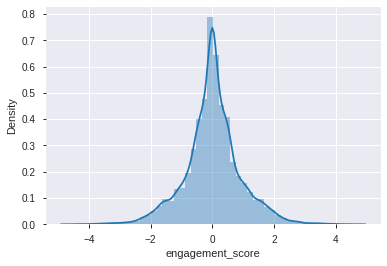

In [ ]:
sns.distplot(y_test-y_pred)

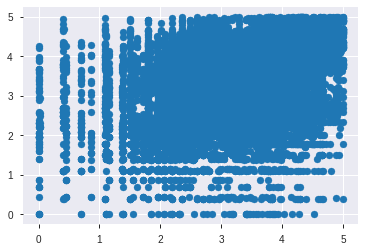

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.6471965620328849
MSE: 0.8264879521674142
RMSE: 0.9091138279486316


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.10628992529346304

#Hyper parameter tuning

In [ ]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
 #calculating different regression metrics

from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)


In [ ]:
tuning_model.fit(X,y)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.628 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.747 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.740 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.750 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, spl

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
# best model score
tuning_model.best_score_

-0.5470235713500334

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=3,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')


In [ ]:
# fitting model

tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [ ]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

In [ ]:
# test the actual test data given in the hackathon
test_pred=tuned_hyper_model.predict(df_test)

In [ ]:
test_pred

array([4.12608663, 3.9533777 , 2.9452007 , ..., 3.9533777 , 3.62417101,
       3.3906798 ])

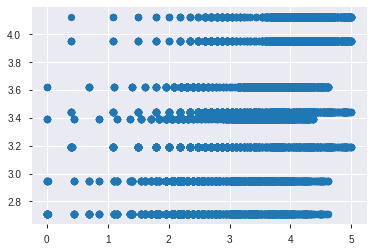

In [ ]:
plt.scatter(y_test,tuned_pred)

In [ ]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.5683359291541589
MSE: 0.542884457011691
RMSE: 0.7368069333357898


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, tuned_pred)

0.2733256379413137

In [ ]:
# DT model with best param
CSV = pd.DataFrame({
    "DT_Model_prediction": test_pred
})

CSV.to_csv("DT_Model_prediction.csv", index=False)

## Random forest model

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor(n_estimators=10,random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [58]:
y_rf_pred=rf_reg.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_rf_pred)

0.30882572307851996

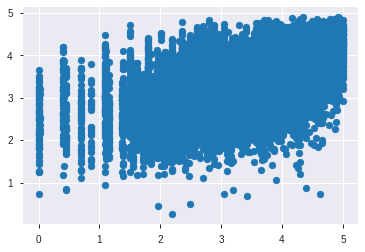

In [ ]:
plt.scatter(y_test,y_rf_pred)

In [ ]:
y_rf_testpred=rf_reg.predict(df_test)   # on actual test data

In [ ]:
# DT model with best param
CSV = pd.DataFrame({
    "RF_Model_prediction": y_rf_testpred
})

CSV.to_csv("RF_Model_prediction.csv", index=False)

###Model explaination by eli5

In [ ]:
pip install eli5

     |████████████████████████████████| 106 kB 8.7 MB/s 


In [60]:
# Import Eli5 package
import eli5
from eli5.sklearn import PermutationImportance

# Find the importance of columns for prediction
perm = PermutationImportance(rf_reg.fit(X_train, y_train), random_state=1).fit(X_test,y_rf_pred)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.0029 ± 0.0145,Male
0.6289 ± 0.0110,Student
0.5633 ± 0.0024,user_id
0.4829 ± 0.0049,views
0.4390 ± 0.0107,category_id
0.4283 ± 0.0048,age
0.3209 ± 0.0043,video_id
0.2138 ± 0.0056,followers
0.1575 ± 0.0036,Working


##Observation:
Random forest model explains that **male student users** have the more weight for the data and are more engagement score.